# Import

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pickle
import joblib

# chargement du dataset

In [3]:
data = pd.read_csv('fetal_health.csv')
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [4]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


# compter les valeurs manquantes


In [6]:

miss_values = data.columns[data.isnull().any()]
print(f"Missing values:\n{data[miss_values].isnull().sum()}")

null_values = data.columns[data.isna().any()]
print(f"Null values:\n{data[null_values].isna().sum()}")

Missing values:
Series([], dtype: float64)
Null values:
Series([], dtype: float64)


Il n'y a pas de valeurs manquantes dans ce dataset

Ce dataset contient 2126 enregistrements.
Le but est de déterminer la santé foetale qui est classée en 3 catégories :  
1.  Normal
2.  Suspect
3.  Pathological


Text(0, 0.5, 'Cases')

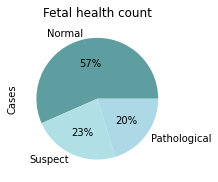

In [11]:

total = data["fetal_health"].sum()
normal = total - 471
suspect = total - 1831
pathological = total - 1950

plt.subplot(122)
plt.title("Fetal state") 

vis_pie_fetal_health = plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], colors = ["#5F9EA0", "#B0E0E6", "#ADD8E6"], autopct="%1.0f%%")
plt.title("Fetal health count")
plt.ylabel("Cases")

#### Quelles variables sont correllées avec la santé foetale ?

In [13]:
Num_feature = numeric_corr["fetal_health"].sort_values(ascending=False).head(20).to_frame()

cm = sns.light_palette("#5F9EA0", as_cmap=True)

style = Num_feature.style.background_gradient(cmap=cm)
style

,fetal_health
fetal_health,1.000000
prolongued_decelerations,0.484859
abnormal_short_term_variability,0.471191
percentage_of_time_with_abnormal_long_term_variability,0.426146
histogram_variance,0.206630
baseline value,0.148151
severe_decelerations,0.131934
fetal_movement,0.088010
histogram_min,0.063175
light_decelerations,0.058870


On peut voir qu'il y a 3 features qui ont une grande correlation avec la colonne ciblée (fetal_health):  
-    "prolongued_decelerations", 
-    "abnormal_short_term_variability", 
-    "percentage_of_time_with_abnormal_long_term_variability" 


### Impact "prolongued_decelerations"

<AxesSubplot:xlabel='fetal_health', ylabel='prolongued_decelerations'>

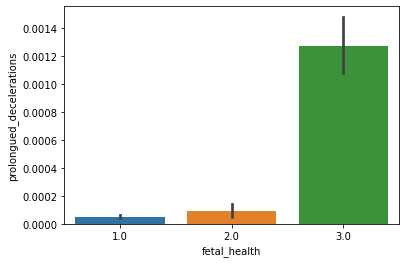

In [19]:
sns.barplot(x="fetal_health", y="prolongued_decelerations", data=data)

### Impact "percentage_of_time_with_abnormal_long_term_variability"

<AxesSubplot:xlabel='fetal_health', ylabel='percentage_of_time_with_abnormal_long_term_variability'>

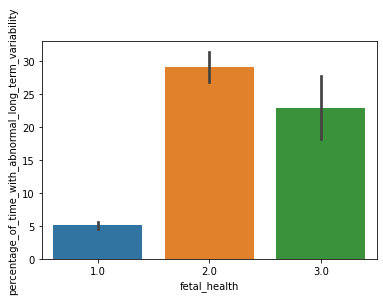

In [21]:
sns.barplot(x="fetal_health", y="percentage_of_time_with_abnormal_long_term_variability", data=data)

### Impact "abnormal_short_term_variability"

<AxesSubplot:xlabel='fetal_health', ylabel='abnormal_short_term_variability'>

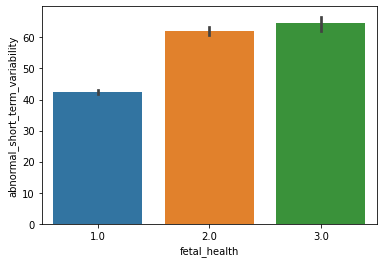

In [20]:
sns.barplot(x="fetal_health", y="abnormal_short_term_variability", data=data)

# Test et Train Split

In [75]:

predictors = data.drop(['fetal_health','histogram_mean','mean_value_of_long_term_variability',
                       'histogram_median','histogram_variance','baseline value','severe_decelerations',
                        'fetal_movement','histogram_min','light_decelerations','histogram_number_of_zeroes',
                        'histogram_number_of_peaks','histogram_max','histogram_width',
                        'mean_value_of_short_term_variability','histogram_tendency','uterine_contractions',
                        'histogram_median','accelerations','histogram_mode'], axis=1)
target = data["fetal_health"]
target

x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.2, random_state = 0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1700, 21), (426, 21), (1700,), (426,))

In [76]:
predictors

,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability
0,0.0,73.0,43.0
1,0.0,17.0,0.0
2,0.0,16.0,0.0
3,0.0,16.0,0.0
4,0.0,16.0,0.0
...,...,...,...
2121,0.0,79.0,25.0
2122,0.0,78.0,22.0
2123,0.0,79.0,20.0
2124,0.0,78.0,27.0


In [77]:
# Gradient Boosting Classifier

cls=GradientBoostingClassifier().fit(x_train,y_train)

cls.score(x_val,y_val)

0.8896713615023474

In [78]:
cls=LogisticRegression(max_iter=200).fit(x_train,y_train)

cls.score(x_val,y_val)

0.8004694835680751

In [79]:
# Random Forest
cls=RandomForestClassifier(max_depth=12,n_estimators=300).fit(x_train,y_train)

cls.score(x_val,y_val)

0.8779342723004695

# Enregistrer le modèle

In [80]:
# save the model to disk
filename = 'cls_fetal_health.pkl'
pickle.dump(cls, open(filename, 'wb'))

## Chargement du modèle

In [121]:
model = joblib.load("cls_fetal_health.pkl")

## Prédiction

In [123]:
# prolongued_decelerations 
x = 1;

# abnormal_short_term_variability 
x2 = 10;

# percentage_of_time_with_abnormal_long_term_variability 
x3 = 70;

new_observation = [[ x, x2, x3]]

In [124]:
model.predict(new_observation)

array([2.])